# Day 6  | Linear regression

The first day of the second week with advanced Python will start with supervised machine learning methods.
We will introduce linear regression and its applicability in fitting the data to a straight line or plane in higher dimensions.

Find trends in the data:

Linear regression models are popular because they can be fit very quickly, and are very interpretable.
You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.
We begin with the standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plotter
import numpy as np

### Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

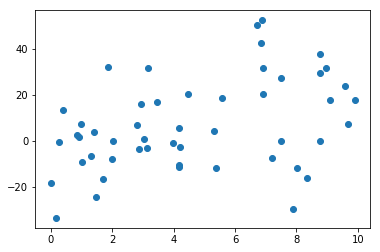

In [2]:
rng = np.random.RandomState(1)
a = 2
b = 5
x = 10 * rng.rand(50)
y = a * x - b + 20*rng.randn(50)
plotter.scatter(x, y);

In [3]:
x.shape

(50,)

In [4]:
x[:, np.newaxis].shape # we need two dimensions! (n, 1)

(50, 1)

In [5]:
y.shape

(50,)

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

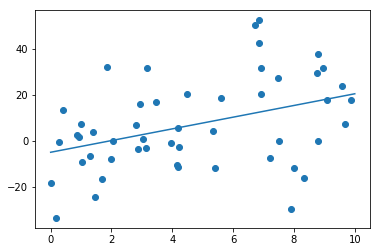

In [6]:
# choosing the model
from sklearn.linear_model import LinearRegression

# instantiating the model, choosing any hyperparameters
model = LinearRegression(fit_intercept=True) # fit_intercept=False passes through the origin 0,0

# fitting the model to our data
model.fit(x[:, np.newaxis], y) 
# X needs to have a shape (n_samples, n_features)
# y needs to have a shape (n_samples, n_targets)

# applying the model to new data
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# representing
plotter.scatter(x, y) # scatter plot of the points
plotter.plot(xfit, yfit); # line

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [8]:
model.coef_ # is an array

array([2.54417621])

In [9]:
model.intercept_

-4.971541711064119

In [51]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.054417620721391
Model intercept: -4.997154171106412


We see that the results are very close to the inputs, as we might hope.

However, in our case, this is not really a good model (see the image, there are a lot of outliers)

# The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [10]:
X = 10 * rng.rand(100, 2)
y = 0.5 + np.dot(X, [1.5, -2.])

model.fit(X, y)
print(model.coef_)
print(model.intercept_)


[ 1.5 -2. ]
0.49999999999999867


In [12]:
X[:5,]

array([[9.32595463, 6.96818161],
       [0.66000173, 7.55463053],
       [7.53876188, 9.23024536],
       [7.11524759, 1.24270962],
       [0.19880134, 0.26210987]])

In [13]:
X.shape

(100, 2)

In [15]:
y[:5]

array([  0.55256872, -13.61925846,  -6.65234788,   8.68745214,
         0.27398227])

In [14]:
y.shape

(100,)

In [16]:
# to get y we are doing: 100,2 * 2,1 = 100,1 (i think)

Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [17]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None]) # we transformed the original data into this new dimensional data (power of 1, 2, 3)
# so i guess it basically does that so it can then use the x^n in the model
# THIS PART IS PREPROCESSING!

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression.
Let's make a 7th-degree polynomial model in this way:

##### pipelines: combining different steps

In [20]:
from sklearn.pipeline import make_pipeline
degree = 3 # first lets try degree 3, we are UNDERFITTING
#instantiating the model
poly_model = make_pipeline(PolynomialFeatures(degree), # combining polynomial preprocessing 
                           LinearRegression())         # with the linear regression model

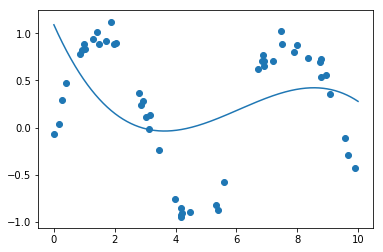

In [21]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

# fitting the model to our data
poly_model.fit(x[:, np.newaxis], y)
# using the model to predict new data
yfit = poly_model.predict(xfit[:, np.newaxis])

plotter.scatter(x, y)
plotter.plot(xfit, yfit);

the fit is kind of bad, let's increase the degree to 7

In [18]:
from sklearn.pipeline import make_pipeline
degree = 7
#instantiating the model
poly_model = make_pipeline(PolynomialFeatures(degree), # combining polynomial preprocessing 
                           LinearRegression())         # with the linear regression model

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

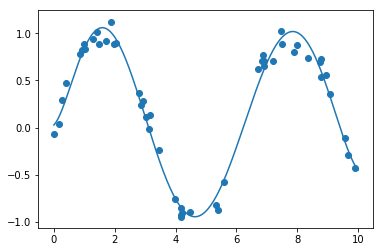

In [19]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

# fitting the model to our data
poly_model.fit(x[:, np.newaxis], y)
# using the model to predict new data
yfit = poly_model.predict(xfit[:, np.newaxis])

plotter.scatter(x, y)
plotter.plot(xfit, yfit);

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

In [22]:
from sklearn.pipeline import make_pipeline
degree = 30 # OVERFITTING!
#instantiating the model
poly_model = make_pipeline(PolynomialFeatures(degree), # combining polynomial preprocessing 
                           LinearRegression())         # with the linear regression model

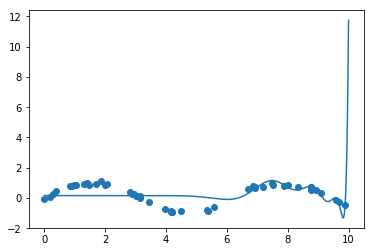

In [23]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

# fitting the model to our data
poly_model.fit(x[:, np.newaxis], y)
# using the model to predict new data
yfit = poly_model.predict(xfit[:, np.newaxis])

plotter.scatter(x, y)
plotter.plot(xfit, yfit);

#### we don't want to underfit or overfit, we want in this case for example the least degree that fits the data best

### Gaussian basis functions - WRITING CUSTOM MODELS

Of course, other basis functions are possible.
For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.
The result might look something like the following figure:

These Gaussian basis functions are not built into Scikit-Learn, but we can write a custom transformer that will create them; reading Scikit-Learn's source is a good way to see how they can be created):

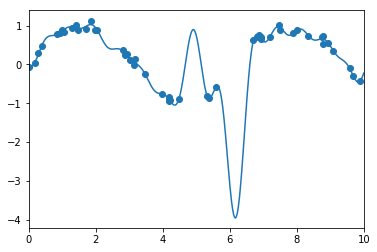

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    # ** Object initializator (the constructor kind of)
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    # ** Python @staticmethod decorator is used to label a class method as a static method, 
    # ** which means that it can be called without instantiating the class first. 
    # ** It simply defines a normal function that is logically contained in the class for readability purposes.
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    # ** we are overriding the fit method from the original object (BaseEstimator)   
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    # ** we are overriding the transform method from the original object (TransformerMixin)
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

# pipeline, instantiating the model    
gauss_model = make_pipeline(GaussianFeatures(30), # N = 30 dimensions (equivalent to the degree) -> OVERFITTING
                            LinearRegression())
# fitting the model to our data
gauss_model.fit(x[:, np.newaxis], y)
# using the model to predict
yfit = gauss_model.predict(xfit[:, np.newaxis])

plotter.scatter(x, y)
plotter.plot(xfit, yfit)
plotter.xlim(0, 10);

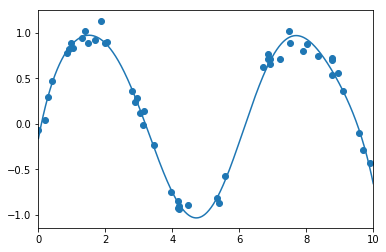

In [29]:
# pipeline, instantiating the model    
gauss_model = make_pipeline(GaussianFeatures(7), # N = 7 dimensions (equivalent to the degree)
                            LinearRegression())
# fitting the model to our data
gauss_model.fit(x[:, np.newaxis], y)
# using the model to predict
yfit = gauss_model.predict(xfit[:, np.newaxis])

plotter.scatter(x, y)
plotter.plot(xfit, yfit)
plotter.xlim(0, 10);

We put this example here just to make clear that there is nothing magic about polynomial basis functions: if you have some sort of intuition into the generating process of your data that makes you think one basis or another might be appropriate, you can use them as well.

##### We shouldn't use linear regression if our data is dependent of each other (for example, gene expression, one gene depends on the other, that is non-linear)

### Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting.
For example, if we choose too many Gaussian basis functions, we end up with results that don't look so good:

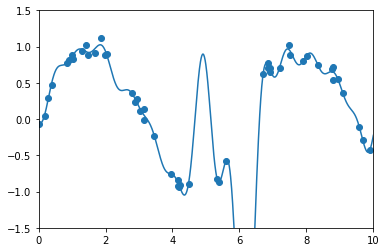

In [30]:
model = make_pipeline(GaussianFeatures(30), # we are overfitting
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plotter.scatter(x, y)
plotter.plot(xfit, model.predict(xfit[:, np.newaxis]))

plotter.xlim(0, 10)
plotter.ylim(-1.5, 1.5);

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.
We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:

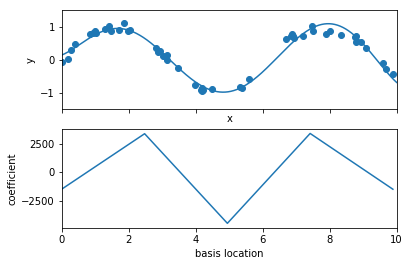

In [31]:
def basis_plot(model, title=None):
    fig, ax = plotter.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_) # plotting centers (x) and coef (y) of our gaussian basis model
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(5), LinearRegression())
model.fit(x[:, np.newaxis], y)
basis_plot(model)


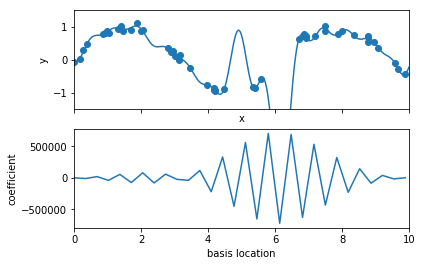

In [32]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
model.fit(x[:, np.newaxis], y)
basis_plot(model)

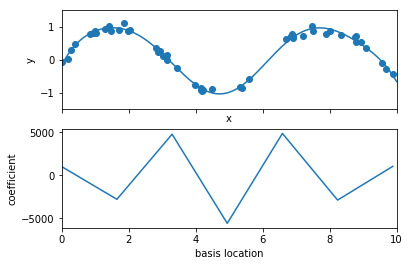

In [33]:
model = make_pipeline(GaussianFeatures(7), LinearRegression())
model.fit(x[:, np.newaxis], y)
basis_plot(model)

The lower panel of this figure shows the amplitude of the basis function at each location.
This is typical over-fitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out.
We know that such behavior is problematic, and it would be nice if we could limit such spikes expliticly in the model by penalizing large values of the model parameters.
Such a penalty is known as *regularization*, and comes in several forms.

###### Ridge regression ($L_2$ Regularization) -> L2 because we square the coefficients

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty, and $\theta_n$ is the value of each coefficient.

This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:

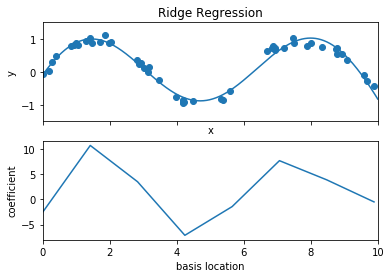

In [36]:
from sklearn.linear_model import Ridge
# Ridge is linear regression + L2 regularization combined
model = make_pipeline(GaussianFeatures(8), Ridge(alpha=0.001)) 
basis_plot(model, title='Ridge Regression')
# this is better than doing nothing!

The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.
One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost than the original linear regression model.

##### Lasso regression ($L_1$ regularization) -> L1 because it is ^1

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients:

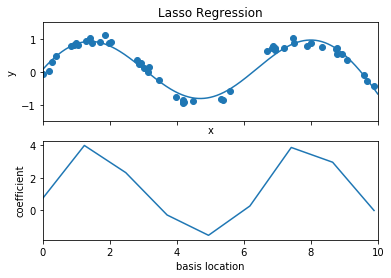

In [39]:
from sklearn.linear_model import ElasticNet
model = make_pipeline(GaussianFeatures(9), ElasticNet(alpha=0.001))
basis_plot(model, title='Lasso Regression')

With the lasso regression penalty, the majority of the coefficients are exactly zero, with the functional behavior being modeled by a small subset of the available basis functions.
As with ridge regularization, the $\alpha$ parameter tunes the strength of the penalty, and should be determined via, for example, cross-validation.

###### in general:
- higher dimensions -> prone to overfitting
- lower dimensions -> prone to underfitting